# Matplotlib 教程

[主页](https://matplotlib.org/)
<br/>
快速上手学习：[实例](https://matplotlib.org/gallery/index.html)，百度，google，知乎
<br/>
深入学习：官网的[模块](https://matplotlib.org/py-modindex.html)

# 基本概念

<img src="./1.jpg" width=450 height=300 align=center/>

Figure：画板
<br/>
Axes(轴域)/subplot(子图)：画纸
<br/>
axis：坐标轴，四个坐标轴构成Axes(轴域)，形成了这个画纸
<br/>
其他基本属性：点线，图例，文本等

# Importing modules

In [52]:
import numpy as np 
import matplotlib.pyplot as plt
#plt.rcParams['font.sans-serif']=['Helvetica'] #字体
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator) #大刻度和小刻度

# 画图方法

## 函数式编程

(0.5, 4.5)

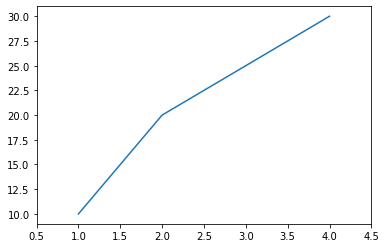

In [70]:
plt.plot([1,2,3,4],[10,20,25,30])
plt.xlim(0.5, 4.5)

通过模块直接调用函数
<br/>
优点：代码简洁，画图轻松
<br/>
缺点：子图的操作容易陷入混乱
<br/>

## 对象式编程

(0.5, 4.5)

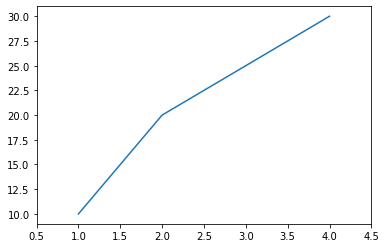

In [72]:
fig=plt.figure()
#ax=fig.add_subplot(111)
ax=plt.gca()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])
ax.set_xlim(0.5, 4.5)

通过对象调用函数
<br/>
优点：表达明确，直接在子图上操作。
<br/>
缺点：代码较多。

# Free energy diagram

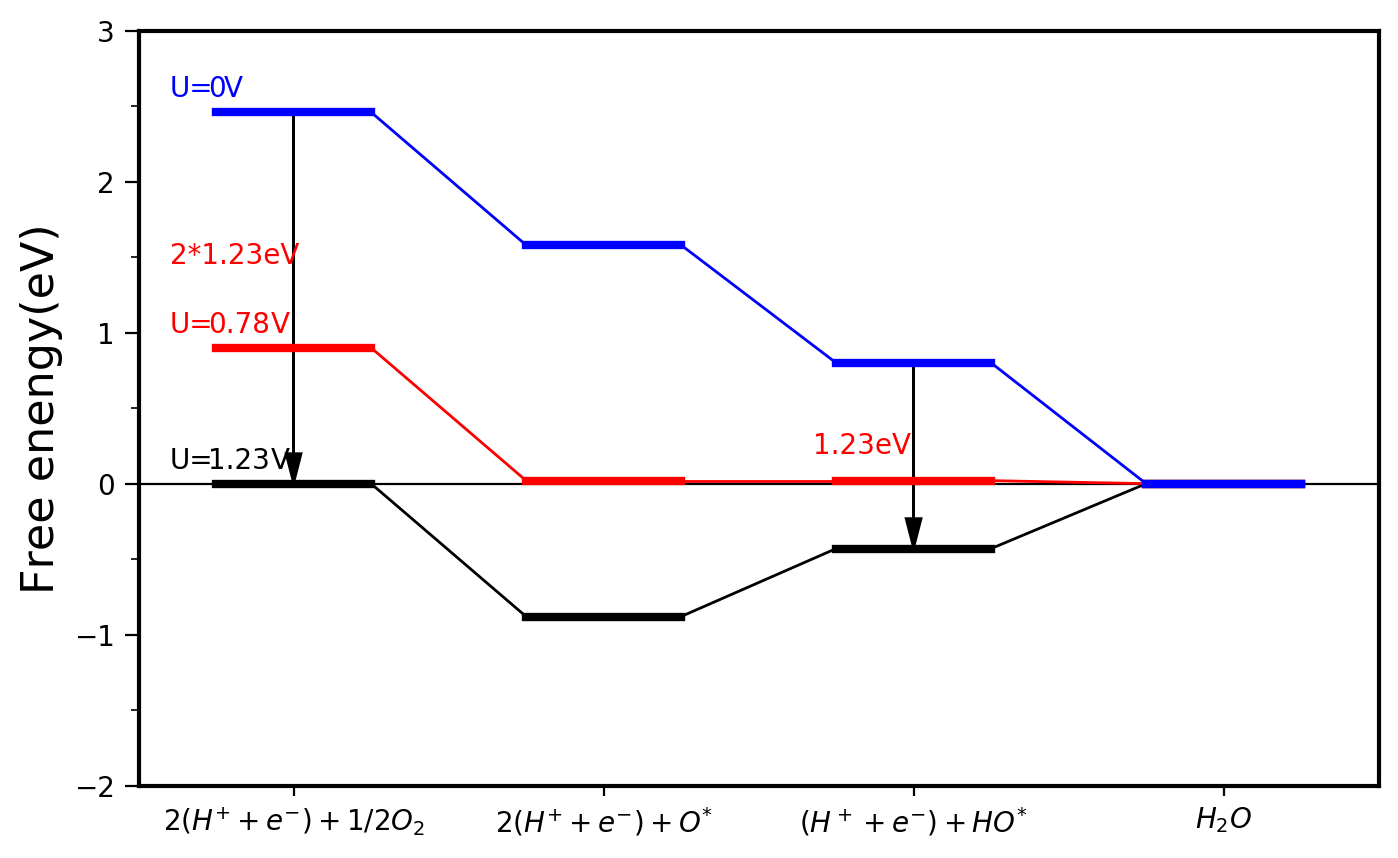

In [87]:
## 导入模块
import numpy as np
import matplotlib.pyplot as plt

## 画板画纸的设置
fig=plt.figure(figsize=(8,5),dpi=200)
ax=plt.gca()

## 线宽和字体大小
lw0=1.5
lw1=1.2
lw2=0.8
fs=16

## 坐标轴
### 边框
ax.spines['bottom'].set_linewidth(lw0)
ax.spines['left'].set_linewidth(lw0)
ax.spines['right'].set_linewidth(lw0)
ax.spines['top'].set_linewidth(lw0)

### 区间
ax.set_ylim(-2, 3)
ax.set_xlim(0, 8)

### 刻度
ax.yaxis.set_minor_locator(MultipleLocator(0.5)) 
ax.yaxis.set_tick_params(which='minor', size=3,direction='out')
ax.yaxis.set_tick_params(which='major', size=5,direction='out')

intermidiate=[r'$2(H^{+}+e^{-})+1/2O_{2}$',r'$2(H^{+}+e^{-})+O^{*}$',r'$(H^++e^{-})+HO^{*}$',r'$H_{2}O$']

### 函数式编程
#plt.xticks(np.arange(1, 8, 2),intermidiate, rotation=0, fontsize=10)

### 对象式编程
ax.set_xticks(np.arange(1, 8, 2))
ax.set_xticklabels(intermidiate,fontsize=10)


### 标签
ax.set_ylabel('Free enengy(eV)',fontsize=fs)

## 水平线 
ax.axhline(0, ls='-', color='black',linewidth=lw2)

## 画图数据
potential=[1.23,0.78,0]
color=['black','red','blue']

## 画图
for i in np.arange(0, 3, 1):
    U=potential[i]
    energy_level=[2.46-2*U,1.58-2*U,0.80-U,0] ## 画图数据
    for j in np.arange(0, 4, 1):
        ax.plot([2*j+0.5, 2*j+1.5], [energy_level[j], energy_level[j]], ls='-', color=color[i], linewidth=3)
    for k in np.arange(0, 3, 1):
        ax.plot([2*k+1.5, 2*k+2.5], [energy_level[k],energy_level[k+1]],ls='-', color=color[i],linewidth=1)
    if i == 2:
        ax.text(0.2,energy_level[0]+0.1,'U=', color= color[i] ,fontsize=10)
        ax.text(0.45,energy_level[0]+0.1, potential[i],  color= color[i] ,fontsize=10)
        ax.text(0.55,energy_level[0]+0.1, 'V', color= color[i] ,fontsize=10)
    else:
        ax.text(0.2,energy_level[0]+0.1,'U=', color= color[i] ,fontsize=10)
        ax.text(0.45,energy_level[0]+0.1, potential[i],  color= color[i] ,fontsize=10)
        ax.text(0.85,energy_level[0]+0.1, 'V', color= color[i] ,fontsize=10)

## 注释
U=potential[2]
energy_level=[2.46-2*U,1.58-2*U,0.80-U,0]
ax.arrow(1, energy_level[0], 0, 2*(potential[2]-potential[0]),
             length_includes_head=True,linewidth=lw2, ls="-",
             head_width=0.1, head_length=0.2, fc='black', ec='black')
ax.arrow(5, energy_level[2], 0, potential[2]-potential[0],
             length_includes_head=True,linewidth=lw2, ls="-",
             head_width=0.1, head_length=0.2, fc='black', ec='black')
ax.text(0.2,energy_level[0]-1,'2*1.23eV', color='red', fontsize=10)
ax.text(4.35,energy_level[3]+0.2,'1.23eV', color='red', fontsize=10)

fig.savefig("free energy diagram/free_energy_diagram.png",bbox_inched='tight')

ORR反应在三个不同电位下的反应路径

# OH adsorption site

## hist

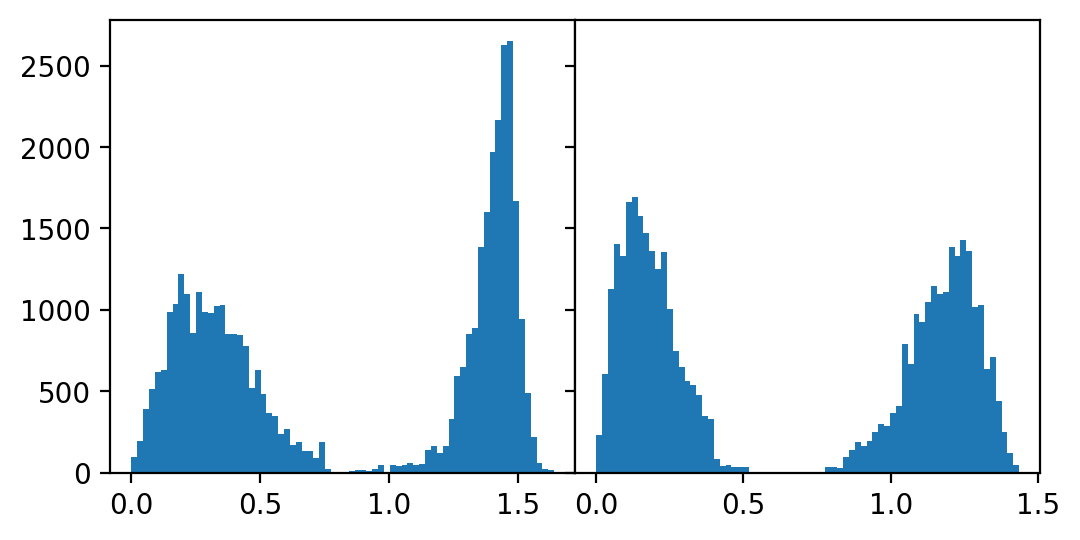

In [66]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(6,3), sharey=True,dpi=200)
fig.subplots_adjust(wspace=0)

## 读取数据
file="oh_ad_site/1_OH.dat"
data = np.loadtxt(file)

ax[0].hist(data[:,0],bins=72)
ax[1].hist(data[:,1],bins=72)


fig.savefig("oh_ad_site/subplot.png", bbox_inched='tight')

## hist2d

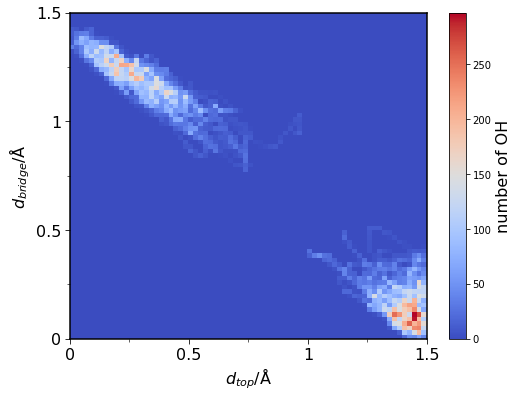

In [68]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(8,6))
ax=plt.gca()


fs=16

ax.spines['bottom'].set_linewidth(lw0)
ax.spines['left'].set_linewidth(lw0)
ax.spines['right'].set_linewidth(lw0)
ax.spines['top'].set_linewidth(lw0)
ax.xaxis.set_minor_locator(MultipleLocator(0.25)) 
ax.xaxis.set_tick_params(which='minor', size=3,direction='out')
ax.xaxis.set_tick_params(which='major', size=5,direction='out')
ax.yaxis.set_minor_locator(MultipleLocator(0.25)) 
ax.yaxis.set_tick_params(which='minor', size=3,direction='out')
ax.yaxis.set_tick_params(which='major', size=5,direction='out')
ax.set_xlabel(r'$d_{top}$/Å',fontsize=fs)
ax.set_ylabel(r'$d_{bridge}$/Å',fontsize=fs)

tick=[0,0.5,1,1.5]
ax.set_xticks(tick)
ax.set_yticks(tick)
ax.set_xticklabels(tick,fontsize=fs)
ax.set_yticklabels(tick,fontsize=fs)


## 读取数据
file="oh_ad_site/1_OH.dat"
data = np.loadtxt(file)


## hist2d二维直方图
### 函数式编程
plt.hist2d(data[:, 0], data[:, 1], bins=72,range=[[0,1.5],[0,1.5]],cmap='coolwarm') ##主要调整bins
## colorbar
cb=plt.colorbar()
cb.set_label(r'number of OH', fontsize=fs) 

### 对象式编程
#ax0=ax.hist2d(data[:, 0], data[:, 1], bins=72,range=[[0,1.5],[0,1.5]],cmap='coolwarm') ##主要调整bins
## colorbar
#fig.colorbar(ax0) 
#cb.set_label(r'number of OH', fontsize=fs)                                                 

fig.savefig("oh_ad_site/oh_ad_site.png", bbox_inched='tight')

OH与bridge位点和top位点之间的距离的热点图

# PDOS

## subplot

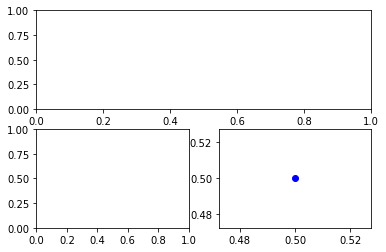

In [95]:
import numpy as np
import matplotlib.pyplot as plt


fig1=plt.figure()

## 对象式编程 
#ax1=fig1.add_subplot(211)
#ax2=fig1.add_subplot(223)
#ax3=fig1.add_subplot(224)

## 函数式编程
plt.subplot(211)
plt.subplot(223)
plt.subplot(224)

#ax1.plot(0.5,0.5,'ob')

plt.plot(0.5,0.5,'ob')

#fig2, ax =plt.subplots(1, 2, figsize=(5,3), sharey=True)
#fig2.subplots_adjust(wspace=0)

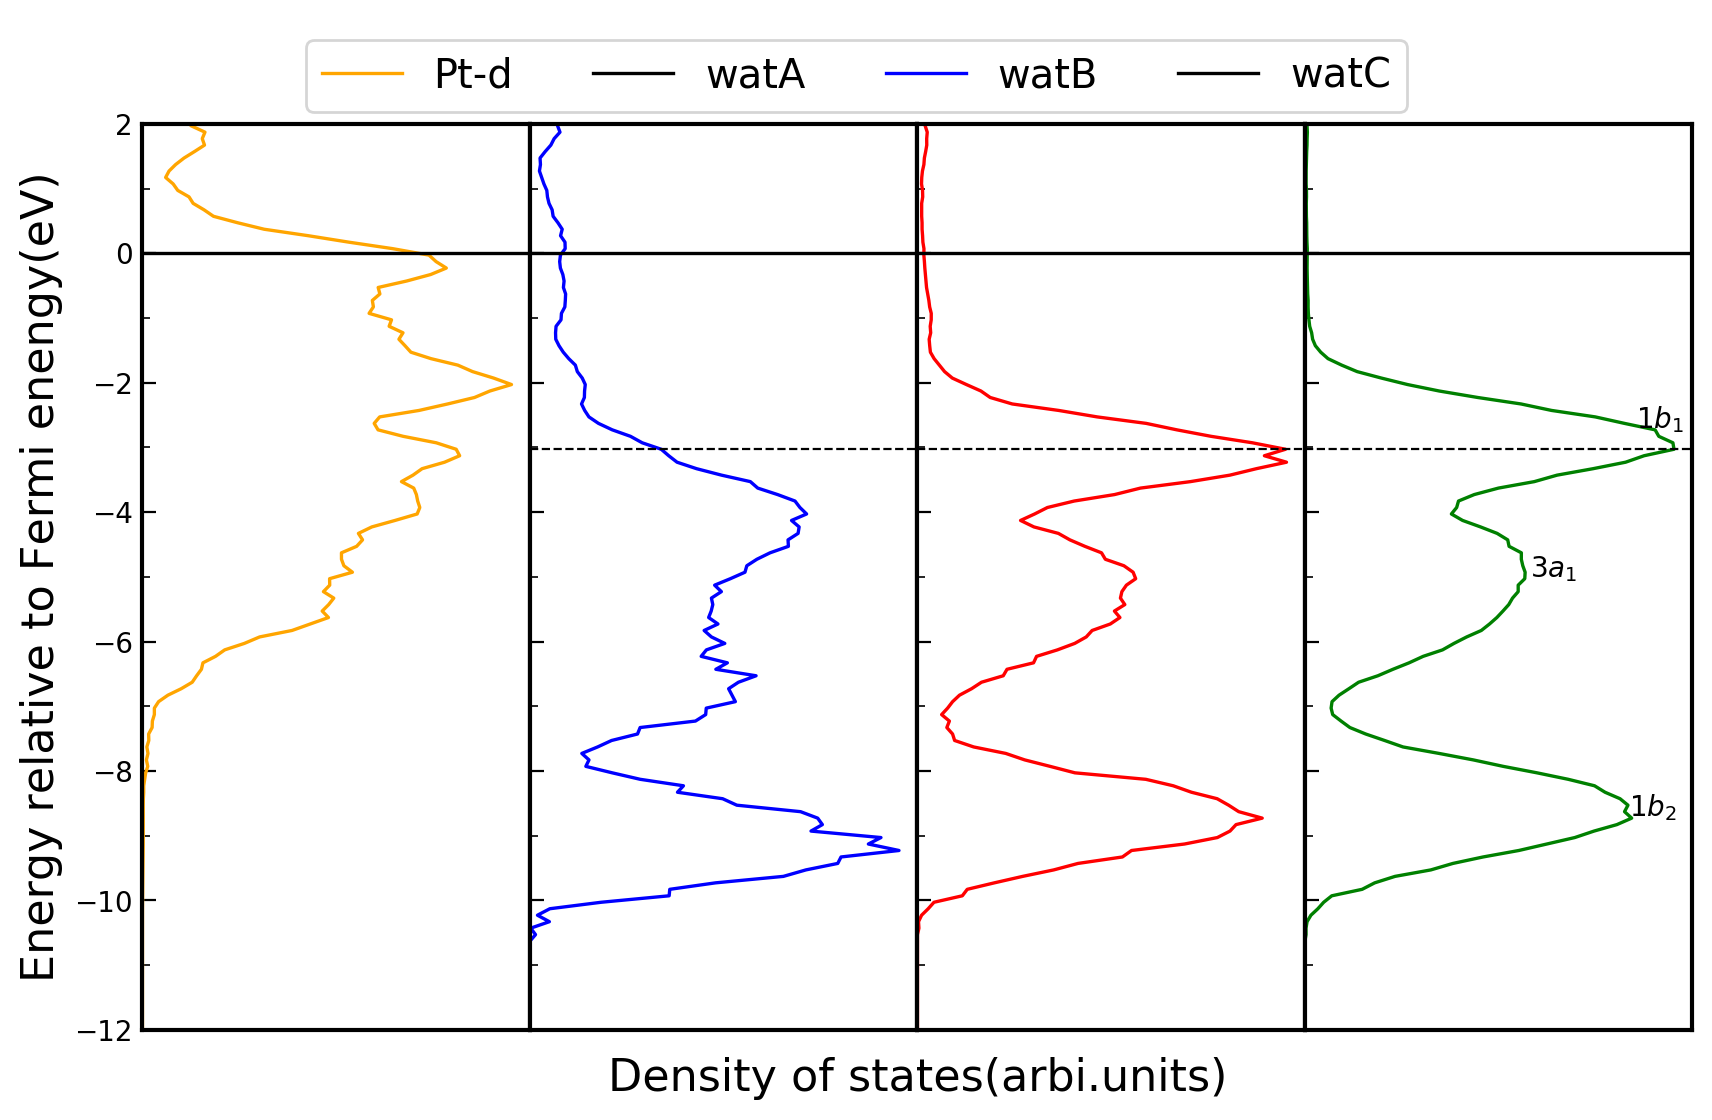

In [100]:
import numpy as np
import matplotlib.pyplot as plt
## setting
fig, ax =plt.subplots(1, 4, figsize=(10,6), sharey=True,dpi=200)
fig.subplots_adjust(wspace=0)

lw0=1.5
lw1=1.2
lw2=0.8
fs=16

## 读取文件
file0="pdos/Pt.MAV"
file1="pdos/watA.MAV"
file2="pdos/watB.MAV"
file3="pdos/watC.MAV"

data_0 = np.loadtxt(file0)
data_1 = np.loadtxt(file1)
data_2 = np.loadtxt(file2)
data_3 = np.loadtxt(file3)



## 子图1
ax[0].plot(data_0[:, 1], data_0[:, 0], color="orange", linewidth=lw1)

### 坐标
ax[0].set_ylim(-12, 2)
ax[0].set_yticks(np.arange(-12, 4, 2))


ax[0].set_ylabel('Energy relative to Fermi enengy(eV)',fontsize=fs)
ax[0].set_xlabel('Density of states(arbi.units)',fontsize=fs)
ax[0].xaxis.set_label_coords(2,-0.03)

## 子图2
ax[1].plot(data_1[:, 1], data_1[:, 0], color="blue", linewidth=lw1)
## 子图3
ax[2].plot(data_2[:, 1], data_2[:, 0], color="red", linewidth=lw1)
## 子图4
ax[3].plot(data_3[:, 1], data_3[:, 0], color="green", linewidth=lw1)

## 循环
for i in np.arange(0, 4, 1):
    ### frame
    ax[i].spines['bottom'].set_linewidth(lw0)
    ax[i].spines['left'].set_linewidth(lw0)
    ax[i].spines['right'].set_linewidth(lw0)
    ax[i].spines['top'].set_linewidth(lw0)
    ### axis
    ax[i].yaxis.set_minor_locator(MultipleLocator(1)) 
    ax[i].yaxis.set_tick_params(which='minor', size=3,direction='in')
    ax[i].yaxis.set_tick_params(which='major', size=5,direction='in')
    ax[i].set_xlim(0,) ## 自动调整上限 
    ax[i].set_xticks(np.arange(-2, 12, 20)) ## 关闭xticks

## 注释
ax[3].text(5,-2.7,r'$1b_{1}$')
ax[3].text(3.4,-5,r'$3a_{1}$')
ax[3].text(4.9,-8.7,r'$1b_{2}$')

## 虚线，实线
ax[0].axhline(0, ls='-', color='black',linewidth=lw1)
ax[1].axhline(0, ls='-', color='black',linewidth=lw1)
ax[1].axhline(-3.02894, ls='--', color='black',linewidth=lw2)
ax[2].axhline(0, ls='-', color='black',linewidth=lw1)
ax[2].axhline(-3.02894, ls='--', color='black',linewidth=lw2)
ax[3].axhline(0, ls='-', color='black',linewidth=lw1)
ax[3].axhline(-3.02894, ls='--', color='black',linewidth=lw2)


## 图例
line_labels=["Pt-d","watA","watB","watC"] ##ax
fig.legend(labels=line_labels,loc="upper center",borderaxespad=1,ncol=4,fontsize="x-large")## fig作为对象来调用函数

fig.savefig('pdos/Pt-PDOS.png')

金属水界面的PDOS图

# Energy level

[[-0.29  2.31  2.  ]
 [-1.29  3.31  2.  ]
 [-0.39  1.31  0.9 ]
 [-0.99  2.01  1.5 ]
 [-2.39  4.01  2.2 ]
 [-2.39  4.01  2.2 ]]


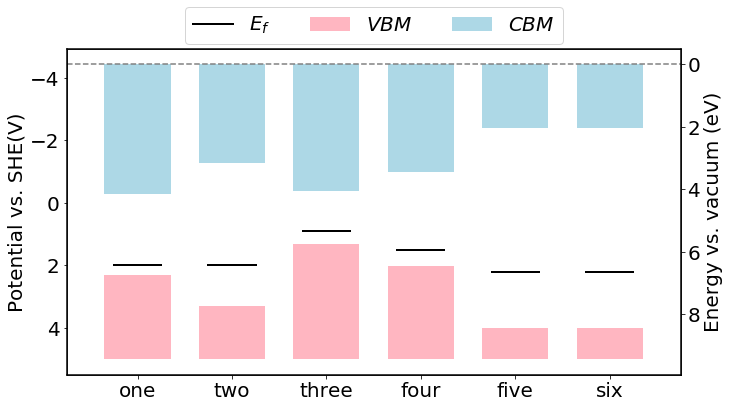

In [88]:
linewidth=2
fs=20
lw2=1.5

## 绘图参数
le=0.2
re=1.2

dif=0.2
diff_band=0.02
diff_lim = 0.5
h_lim=5.0
l_lim=-4.44

names= ["one", "two","three", "four", "five", "six"]

## 绘图数据
levels = np.loadtxt("energy levels/energylevels.txt")
print(levels)

##figure 
plot_fig = 0 

if plot_fig == 0:
    figure_1 = plt.figure(figsize=(len(levels)*1.5+2, 6))
if plot_fig == 1:
    figure_1 = plt.figure(figsize=(len(levels)*1.5+2, 6), dpi=500) ##方便画图

ax=plt.gca()

## axis
ax.spines['bottom'].set_linewidth(lw2)
ax.spines['left'].set_linewidth(lw2)
ax.spines['right'].set_linewidth(lw2)
ax.spines['top'].set_linewidth(lw2)

plt.xlim(0, len(levels)*2+1) #根据能带的数量设置x轴上限
plt.ylim(l_lim-diff_lim, h_lim+diff_lim)
#plt.ylim(h_lim+diff_lim, l_lim-diff_lim)

scale_ls = np.arange(len(levels))*2+1.5 
plt.xticks(scale_ls, names, rotation=0, fontsize=fs)
plt.ylabel('Potential vs. SHE(V)',fontsize=fs)
plt.yticks(fontsize=fs)

##plot
for idx, level in enumerate(levels): ##把二维数组化成6个一维数组
    pos = idx*2+1
    if idx == 0: ##用第一个能带的label画图例
        plt.plot([pos-le+dif, pos+re-dif], [level[2], level[2]], color="black", lw=linewidth, label=r"$E_f$")
        plt.fill_between([pos-le, pos+re], [level[1], level[1]], [h_lim, h_lim], facecolor = "lightpink", label=r"$VBM$")
        ## 将两条水平线之间的区域填满
        plt.fill_between([pos-le, pos+re], [level[0], level[0]], [l_lim, l_lim], facecolor = "lightblue", label=r"$CBM$")
    else:
        plt.plot([pos-le+dif, pos+re-dif], [level[2], level[2]], color="black", lw=linewidth)
        plt.fill_between([pos-le, pos+re], [level[1], level[1]], [h_lim, h_lim], facecolor = "lightpink")
        plt.fill_between([pos-le, pos+re], [level[0], level[0]], [l_lim, l_lim], facecolor = "lightblue")
        
##legend
plt.legend(bbox_to_anchor=(0., 1.02, 1., 0.102), loc="center", ncol=3, fontsize=fs)


## 坐标轴
plt.gca().invert_yaxis() ##倒转y轴 
plt.axhline(-4.44, ls='--', color='grey') ##电子在真空中参比SHE的电势

ax2 = ax.twinx() ##双坐标轴
plt.ylim(l_lim-diff_lim+4.44, h_lim+diff_lim+4.44)
plt.gca().invert_yaxis() ##倒转y轴 

plt.yticks(fontsize=fs)
plt.ylabel('Energy vs. vacuum (eV)',fontsize=fs)

if plot_fig == 0:
    plt.show()
if plot_fig == 1:
    plt.show()
    plt.savefig("energy levels/energylevels.png",bbox_inches = 'tight')
plt.cla()

plt.close("all")